# Iron Ore Prices Forecasting Project

Overview:  
Visualizing the Rise in Commodity Prices
https://elements.visualcapitalist.com/visualizing-the-rise-in-commodity-prices/  

https://www.weforum.org/agenda/2021/06/global-steel-production/

In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from statsmodels.tsa import arima, stattools, seasonal

#### 1. Data

Data sources:  
- Iron Ore Prices:  
MarketIndex.com.au/iron-ore  
- Rain Fall in Australia:  
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package  
http://www.bom.gov.au/climate/data/

In [2]:
# Iron Ore Prices Historical Data
df = pd.read_excel('commodities-workbook (1).xlsx', 
                   sheet_name='Iron Ore',
                   usecols='A:B',
                   index_col = 0,
                   header=10)
df.head()

,Price
Date,
1980-01-01,12.15
1980-02-01,12.15
1980-03-01,12.15
1980-04-01,12.15
1980-05-01,12.15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 493 entries, 1980-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   493 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


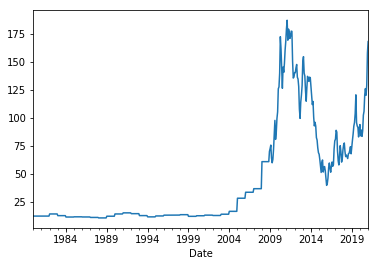

In [4]:
df['Price'].plot();

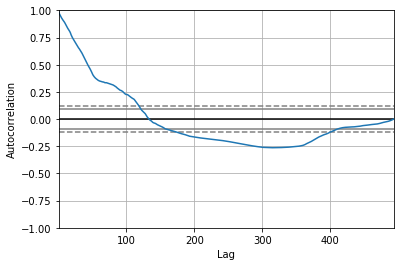

In [5]:
pd.plotting.autocorrelation_plot(df['Price']);

We can see that there is a positive correlation with the first 130-to-140 lags that is perhaps significant for the first 120 lags. Let's take the lag for stronger correlations values (>0.25): about 100 lags.

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise

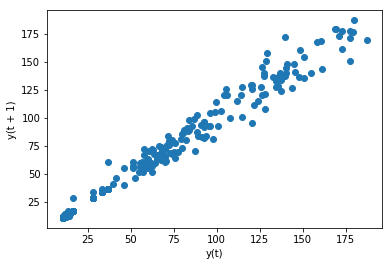

In [6]:
pd.plotting.lag_plot(df['Price']);

In [15]:
help(sm.tsa)

Help on package statsmodels.tsa in statsmodels:

NAME
    statsmodels.tsa

PACKAGE CONTENTS
    _bds
    _innovations
    _stl
    adfvalues
    api
    ar_model
    arima (package)
    arima_model
    arima_process
    arma_mle
    base (package)
    coint_tables
    descriptivestats
    deterministic
    exponential_smoothing (package)
    filters (package)
    forecasting (package)
    holtwinters (package)
    innovations (package)
    interp (package)
    kalmanf (package)
    mlemodel
    regime_switching (package)
    seasonal
    statespace (package)
    stattools
    tests (package)
    tsatools
    varma_process
    vector_ar (package)
    x13

DATA
    test = <statsmodels.tools._testing.PytestTester object>

FILE
    c:\users\rejane\anaconda3\lib\site-packages\statsmodels\tsa\__init__.py




Ref: https://www.machinelearningplus.com/time-series/time-series-analysis-python/  
Forecasting a stationary series is relatively easy and the forecasts are more reliable.  

An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.  

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

In [23]:
### Testing For Stationarity
def adfuller_test(s):
    """
    Input:
    s: series to test for stationarity
    
    Description:
    Stationary data means data which has no trend with respect to the time
    Ho: It is non stationary
    H1: It is stationary
    """
    result= sm.tsa.stattools.adfuller(s)
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("P value is less than 0.05: Reject the null hypothesis(Ho). The data has no unit root and it is stationary")
    else:
        print("Weak evidence against null hypothesis. The time series has a unit root which indicates that it is non-stationary ")

adfuller_test(df['Price'])

ADF Test Statistic : -0.7045383901965119
p-value : 0.8455704876407505
Number of Lags Used : 17
Number of Observations Used : 475
Weak evidence against null hypothesis. The time series has a unit root which indicates that it is non-stationary 


In [24]:
help(sm.tsa)

Help on package statsmodels.tsa in statsmodels:

NAME
    statsmodels.tsa

PACKAGE CONTENTS
    _bds
    _innovations
    _stl
    adfvalues
    api
    ar_model
    arima (package)
    arima_model
    arima_process
    arma_mle
    base (package)
    coint_tables
    descriptivestats
    deterministic
    exponential_smoothing (package)
    filters (package)
    forecasting (package)
    holtwinters (package)
    innovations (package)
    interp (package)
    kalmanf (package)
    mlemodel
    regime_switching (package)
    seasonal
    statespace (package)
    stattools
    tests (package)
    tsatools
    varma_process
    vector_ar (package)
    x13

DATA
    test = <statsmodels.tools._testing.PytestTester object>

FILE
    c:\users\rejane\anaconda3\lib\site-packages\statsmodels\tsa\__init__.py




C:\Users\Rejane\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Rejane\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS 

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  492
Model:                ARIMA(10, 1, 0)   Log Likelihood               -1496.766
Method:                       css-mle   S.D. of innovations              5.066
Date:                Sun, 22 Aug 2021   AIC                           3017.533
Time:                        12:03:35   BIC                           3067.914
Sample:                    02-01-1980   HQIC                          3037.316
                         - 01-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3991      0.399      1.001      0.317      -0.382       1.180
ar.L1.D.Price      0.2252      0.045      5.026      0.000       0.137       0.313
ar.L2.D.Price     -0.1779      0.047

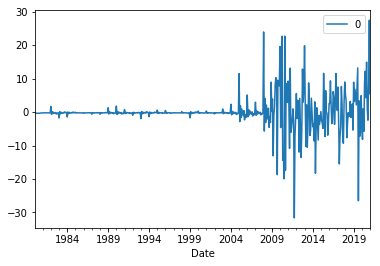

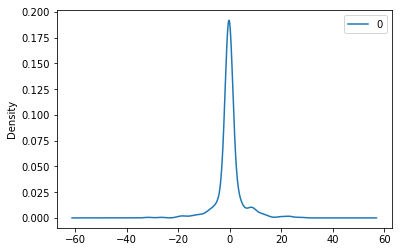

                0
count  492.000000
mean     0.002598
std      5.071649
min    -31.627051
25%     -0.404580
50%     -0.227797
75%     -0.025235
max     27.444694


In [26]:
# fit model
model = sm.tsa.arima_model.ARIMA(df['Price'], order=(10,1,0), dates = df.index)
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

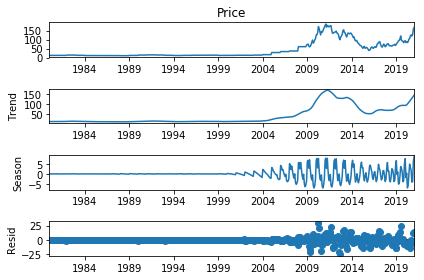

In [29]:
# seasonality and trend
stl = sm.tsa.seasonal.STL(df['Price'], seasonal=13)
res = stl.fit()
fig = res.plot()

In [36]:
# Test for trend and seasonality
# KPSS Test
def kpss_test(series):
    """
    Input: series
    Description: the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for the null hypothesis that x is level or trend stationary.
    """
result = sm.tsa.stattools.kpss(df['Price'], regression='c')
print('\nKPSS Statistic for level: %f' % result[0])
print('p-value: %f' % result[1])
#for key, value in result[3].items():
#    print('Critical Values:')
#    print(f'   {key}, {value}')
result = sm.tsa.stattools.kpss(df['Price'], regression='ct')
print('\nKPSS Statistic for trend: %f' % result[0])
print('p-value: %f' % result[1])
#for key, value in result[3].items():
#    print('Critical Values:')
#    print(f'   {key}, {value}')


KPSS Statistic for level: 1.657264
p-value: 0.010000

KPSS Statistic for trend: 0.239294
p-value: 0.010000


C:\Users\Rejane\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Rejane\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning
C:\Users\Rejane\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than

O teste KPSS mostrou que a série não é estacionária nem para nível nem para tendência.

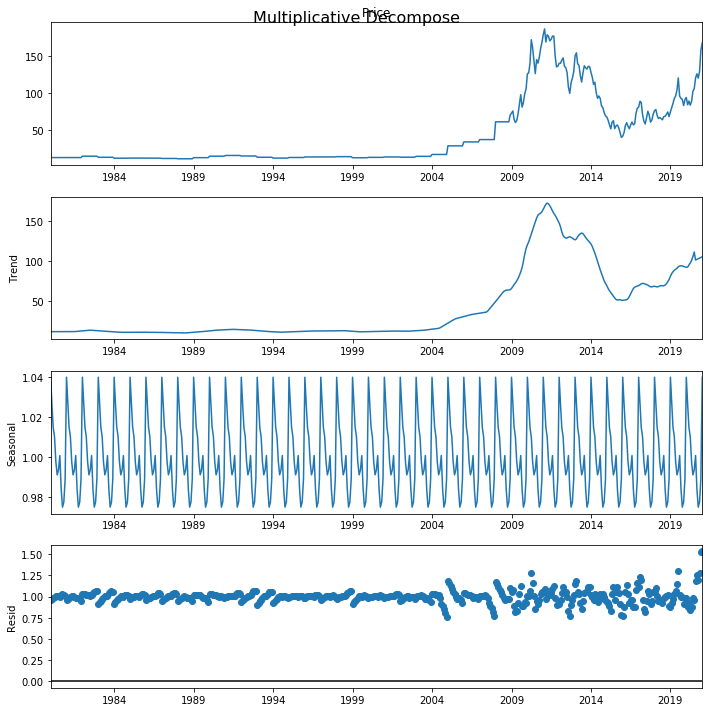

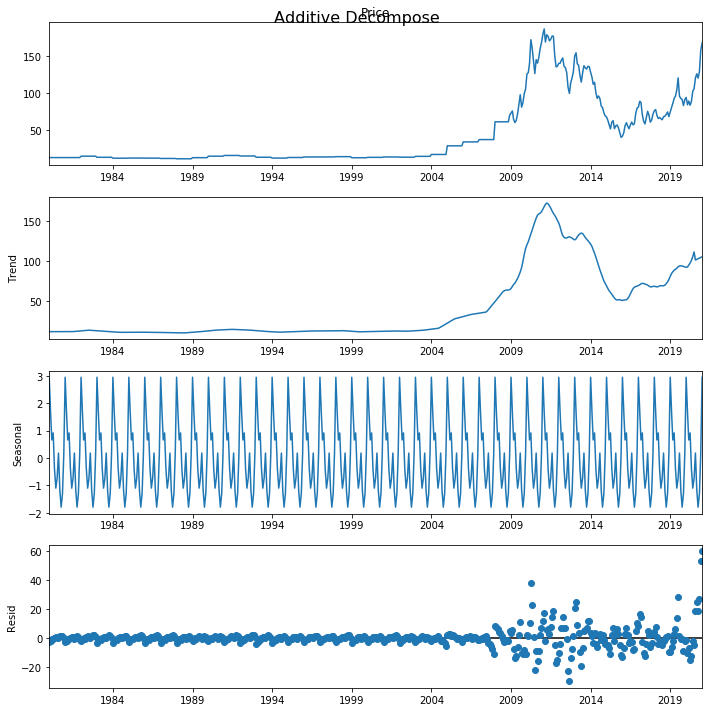

In [32]:
# Decomposing the series 
#Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the beginning of the seri

# Multiplicative Decomposition 
result_mul = sm.tsa.seasonal.seasonal_decompose(df['Price'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = sm.tsa.seasonal.seasonal_decompose(df['Price'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=16)
result_add.plot().suptitle('Additive Decompose', fontsize=16)
plt.show()

Ref: https://www.machinelearningplus.com/time-series/time-series-analysis-python/  
Granger causality test is used to determine if one time series will be useful to forecast another.  
It is based on the idea that if X causes Y, then the forecast of Y based on previous values of Y AND the previous values of X should outperform the forecast of Y based on previous values of Y alone.  
The Granger causality should not be used to test if a lag of Y causes Y. Instead, it is generally used on exogenous (not Y lag) variables only.  
The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

In [ ]:
# Test for causality
df['month'] = pd.Series(df.index).dt.month
sm.tsa.stattools.grangercausalitytests(df[['Price', 'month']], maxlag=5)

C:\Users\Rejane\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Rejane\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS 

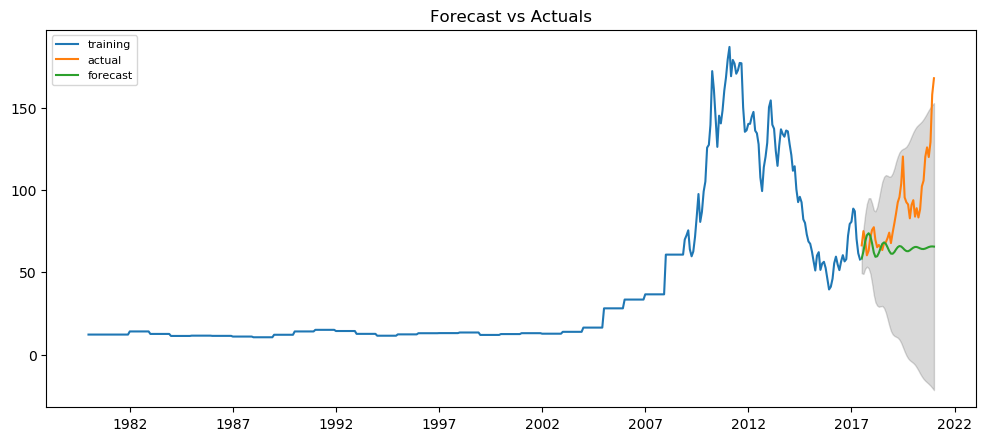

In [44]:
# split in train and test datasets
train = df['Price'][:450]
test = df['Price'][450:]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = sm.tsa.arima_model.ARIMA(train, order=(10,1,0), dates = train.index)
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Disappointing :(

In [46]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = sm.tsa.stattools.acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc_series, test)

C:\Users\Rejane\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
C:\Users\Rejane\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Rejane\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Rejane\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Support for multi-d

{'mape': 0.24225024894452069,
 'me': -23.832525045525493,
 'mae': 25.12983638023165,
 'mpe': -0.22141866289388562,
 'rmse': 34.394431787111316,
 'acf1': 0.8099155990513964,
 'corr': -0.015471471551419336,
 'minmax': 0.2408166265956152}

In [ ]:
#!pip install pmdarima
import pmdarima as pm
from pmdarima.model_selection import train_test_split

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  443
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1312.197
Date:                Sun, 22 Aug 2021   AIC                           2630.394
Time:                        17:31:53   BIC                           2642.668
Sample:                             0   HQIC                          2635.235
                                - 443                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2251      0.020     11.245      0.000       0.186       0.264
ma.L2         -0.1033      0.023     -4.476      0.000      -0.149      -0.058
sigma2        22.1861      0.582     38.142      0.0

C:\Users\Rejane\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Rejane\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


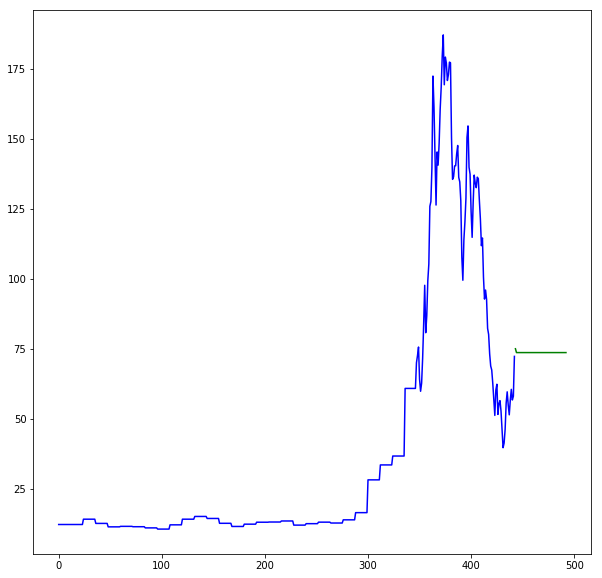

In [55]:
# split your data
train, test = train_test_split(df['Price'], train_size=.9)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=1)
print(model.summary())

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(df['Price'].shape[0])
train_size = train.shape[0]
plt.plot(x[:train_size], train, c='blue')
plt.plot(x[train_size:], forecasts, c='green')
plt.show()

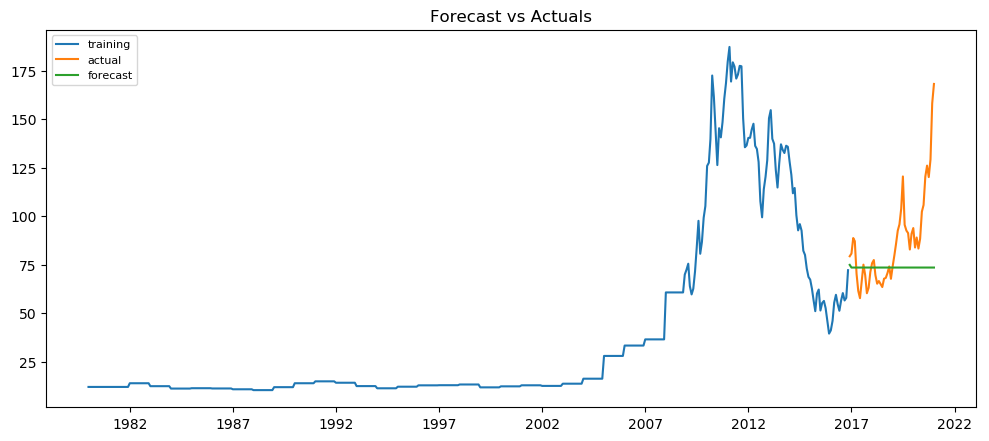

In [54]:
# Forecast
#fc, se, conf = model.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(forecasts, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Acknowlegments:
https://otexts.com/fpp2/  
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/  
https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/  
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/  
https://github.com/alkaline-ml/pmdarima
